#### Intrusion Detection System

In [132]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable


In [133]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [134]:
train=pd.read_csv('C:/Users/swethachintalapudi/Desktop/Final Year Projects/Network Intrusion Detection/NSL_KDD Dataset/Train.txt',sep=',')
test=pd.read_csv('C:/Users/swethachintalapudi/Desktop/Final Year Projects/Network Intrusion Detection/NSL_KDD Dataset/Test.txt',sep=',')

In [135]:
train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [136]:
columns=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
         "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations", 
         "num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate",
         "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate",
         "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
         "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
         "dst_host_srv_rerror_rate","attack","last_flag"] 

In [137]:
train.columns=columns
test.columns=columns

In [138]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [139]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [140]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [141]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [142]:
train.isnull().sum().sum()

0

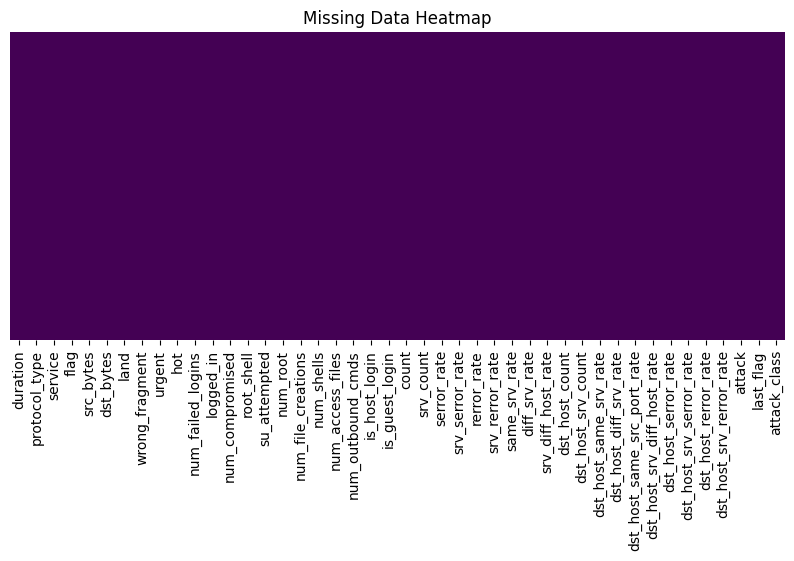

In [43]:
#Heatmap for missing data
plt.figure(figsize=(10, 4))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis',yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()

In [13]:
train.shape

(125972, 43)

In [39]:

print(train.groupby('protocol_type')['protocol_type'].count())

protocol_type
icmp      8291
tcp     102688
udp      14993
Name: protocol_type, dtype: int64


In [40]:

print(train.groupby('service')['service'].count())

service
IRC          187
X11           73
Z39_50       862
aol            2
auth         955
            ... 
urp_i        602
uucp         780
uucp_path    689
vmnet        617
whois        693
Name: service, Length: 70, dtype: int64


In [41]:

print(train.groupby('flag')['flag'].count())

flag
OTH          46
REJ       11233
RSTO       1562
RSTOS0      103
RSTR       2421
S0        34851
S1          365
S2          127
S3           49
SF        74944
SH          271
Name: flag, dtype: int64


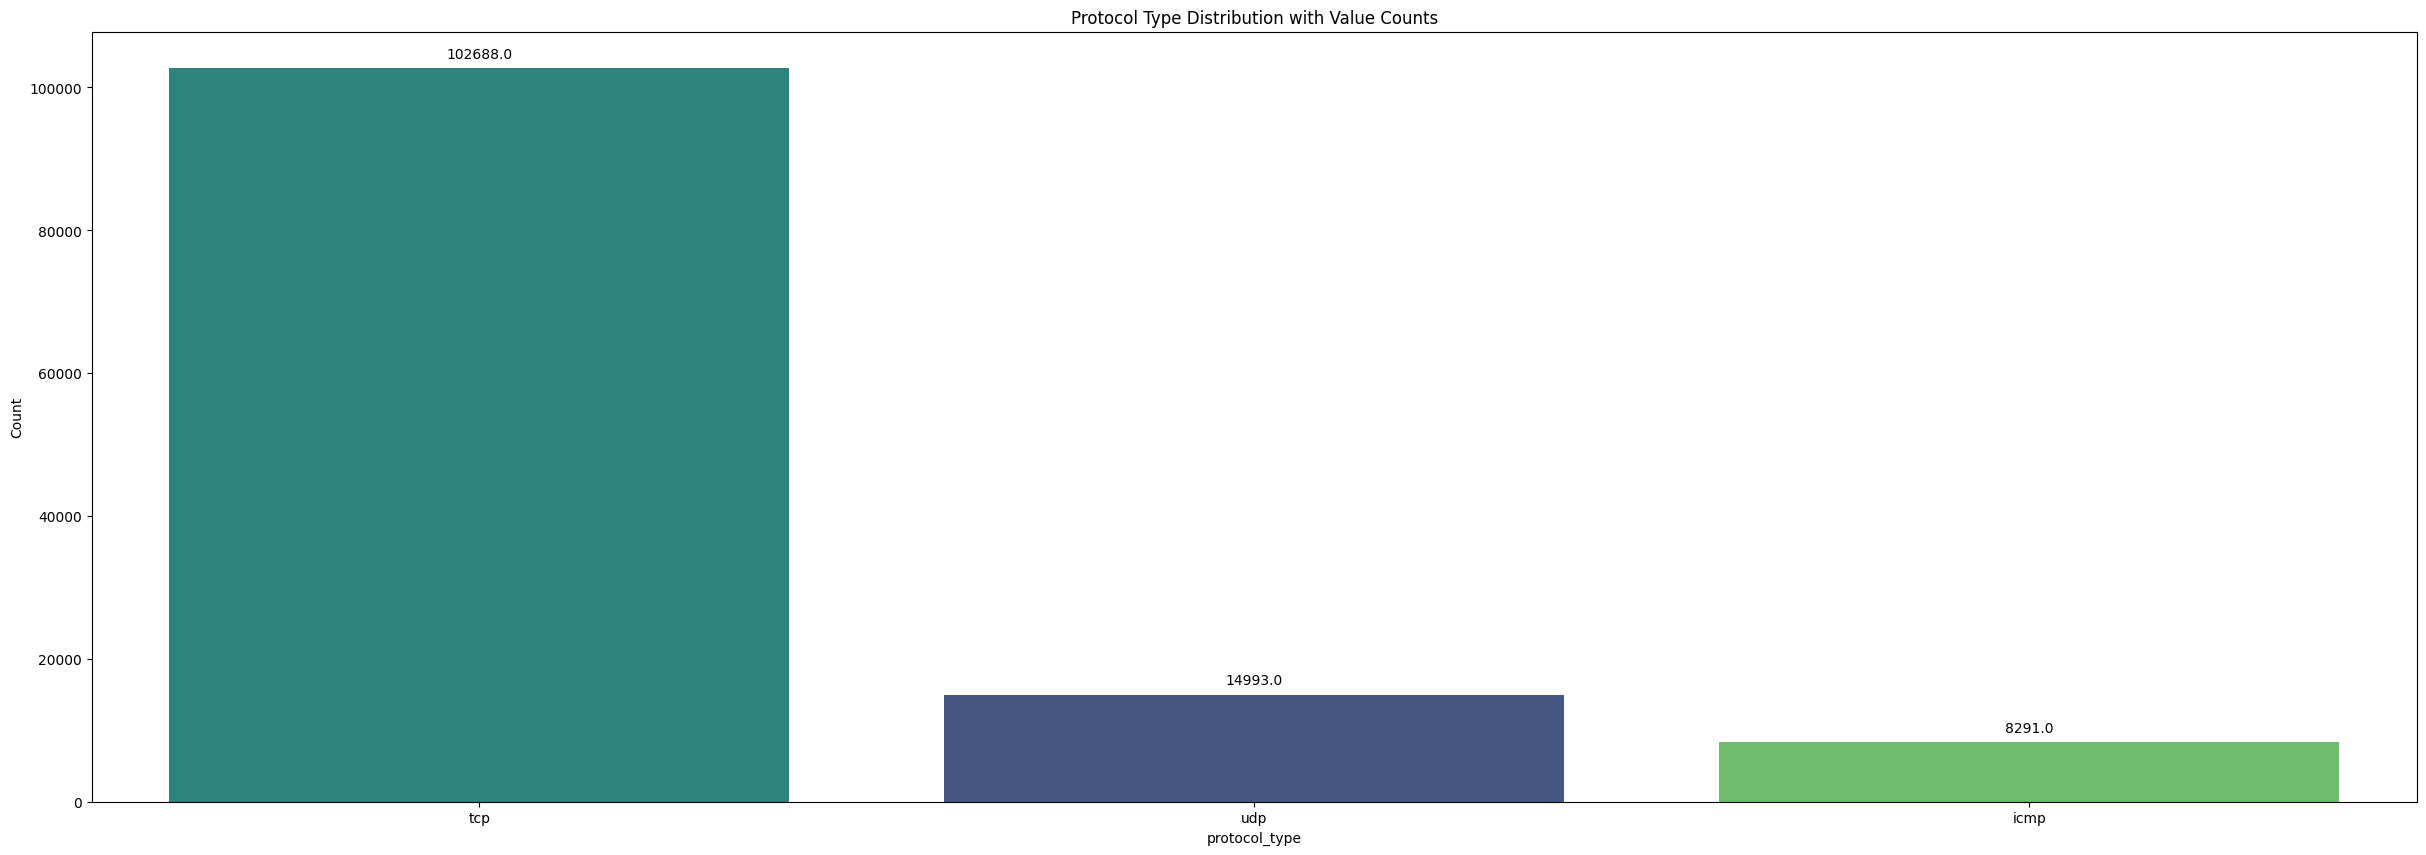

In [17]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.simplefilter(action='ignore', category=FutureWarning)
plt.figure(figsize=(30, 10))
sns.countplot(x="protocol_type", data=train, hue="protocol_type", palette="viridis", order=train["protocol_type"].value_counts().index, legend=False)

# Display value counts on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel("protocol_type")
plt.ylabel("Count")
plt.title("Protocol Type Distribution with Value Counts")
plt.show()

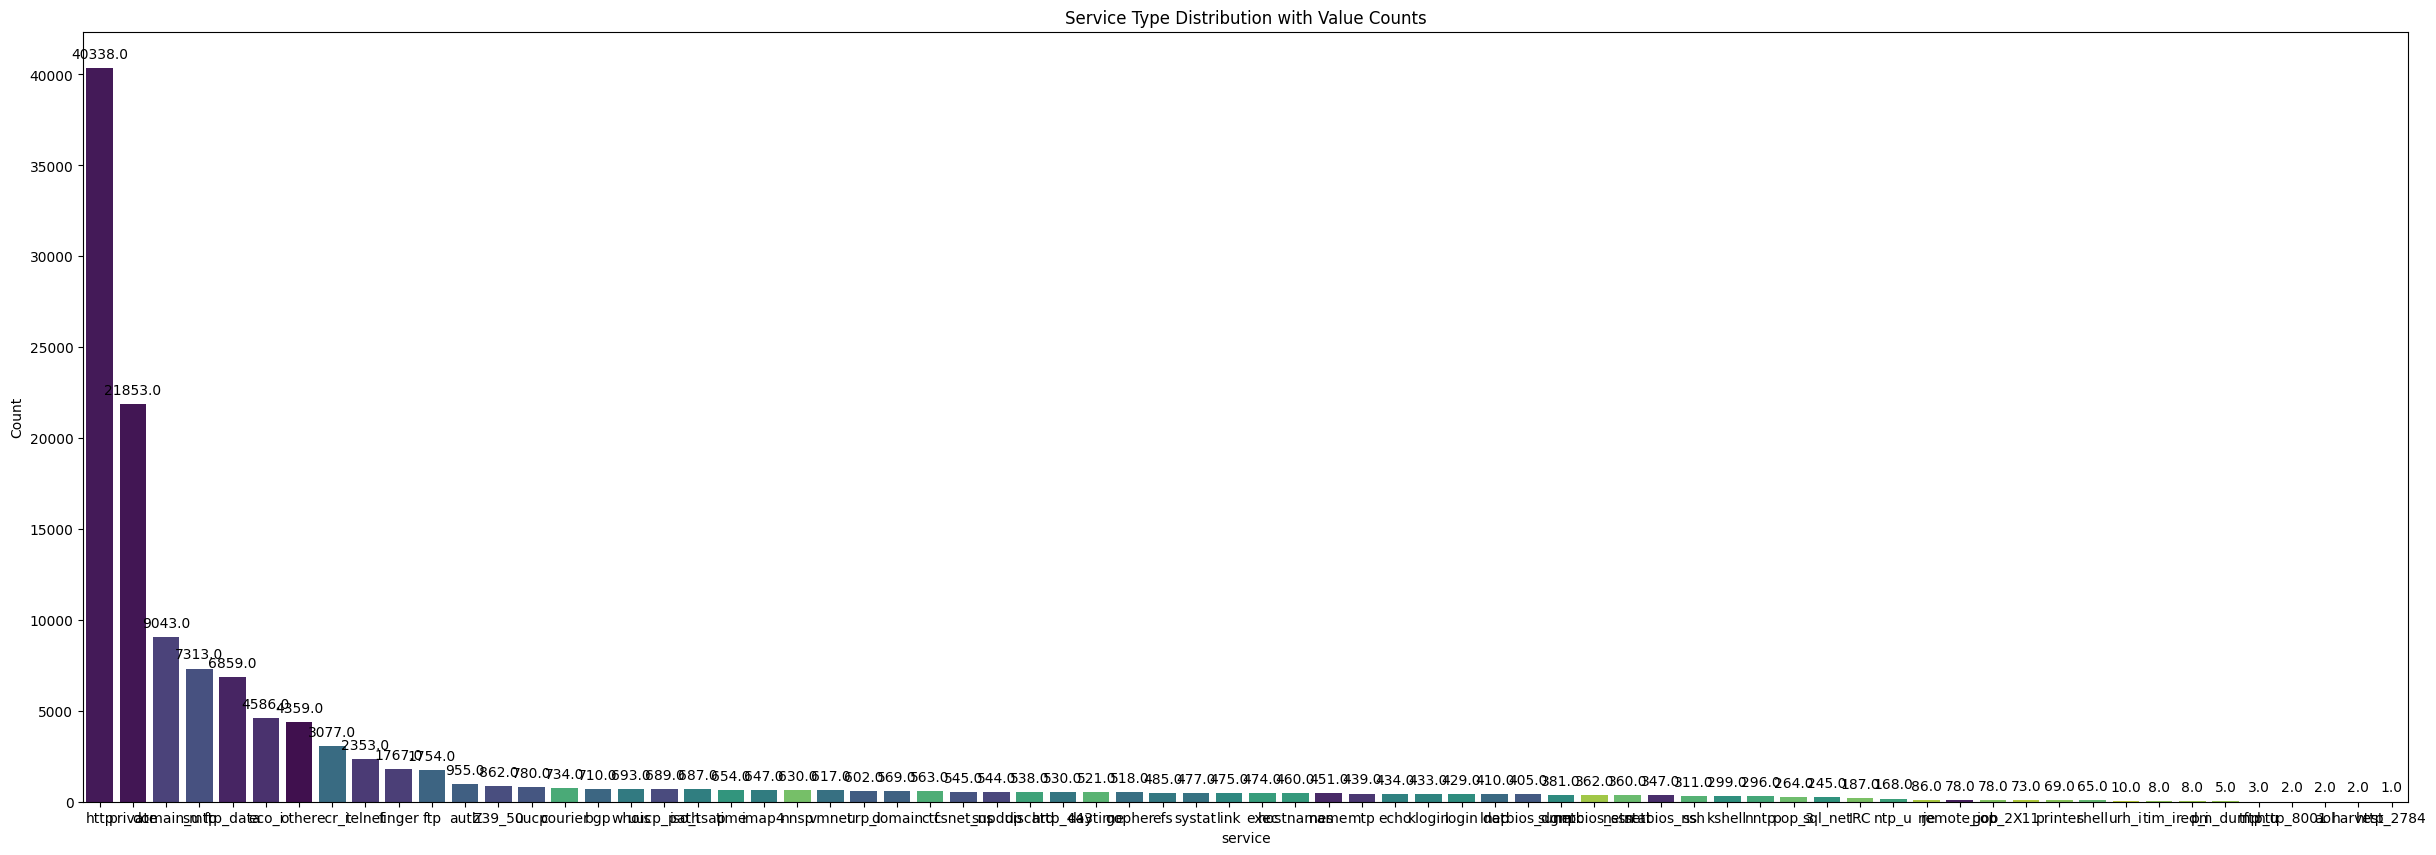

In [10]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)

# Assuming 'train' is your DataFrame
plt.figure(figsize=(30, 10))
sns.countplot(x="service", data=train, hue="service", palette="viridis", order=train["service"].value_counts().index, legend=False)

# Display value counts on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel("service")
plt.ylabel("Count")
plt.title("Service Type Distribution with Value Counts")
plt.show()


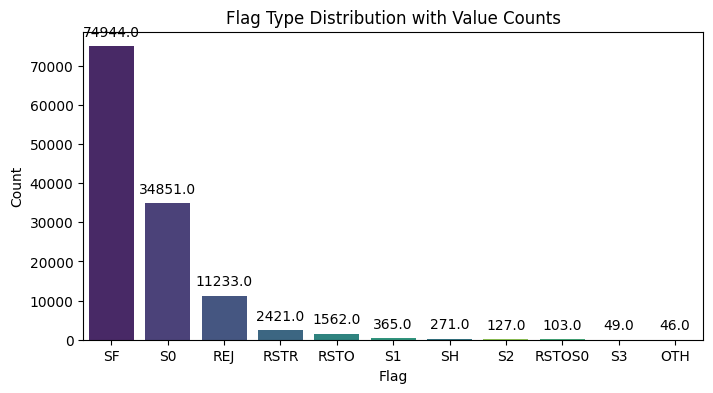

In [11]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)

# Assuming 'train' is your DataFrame
plt.figure(figsize=(8, 4))
sns.countplot(x="flag", data=train, hue="flag", palette="viridis", order=train["flag"].value_counts().index, legend=False)

# Display value counts on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel("Flag")
plt.ylabel("Count")
plt.title("Flag Type Distribution with Value Counts")
plt.show()


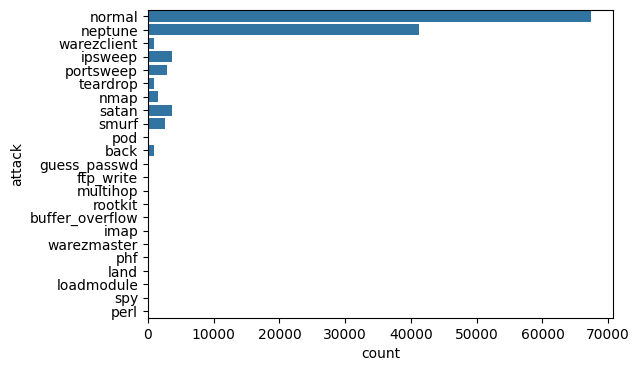

In [20]:
# attack distribution
plt.figure(figsize=(6,4))
sns.countplot(y="attack", data=train)
plt.show()

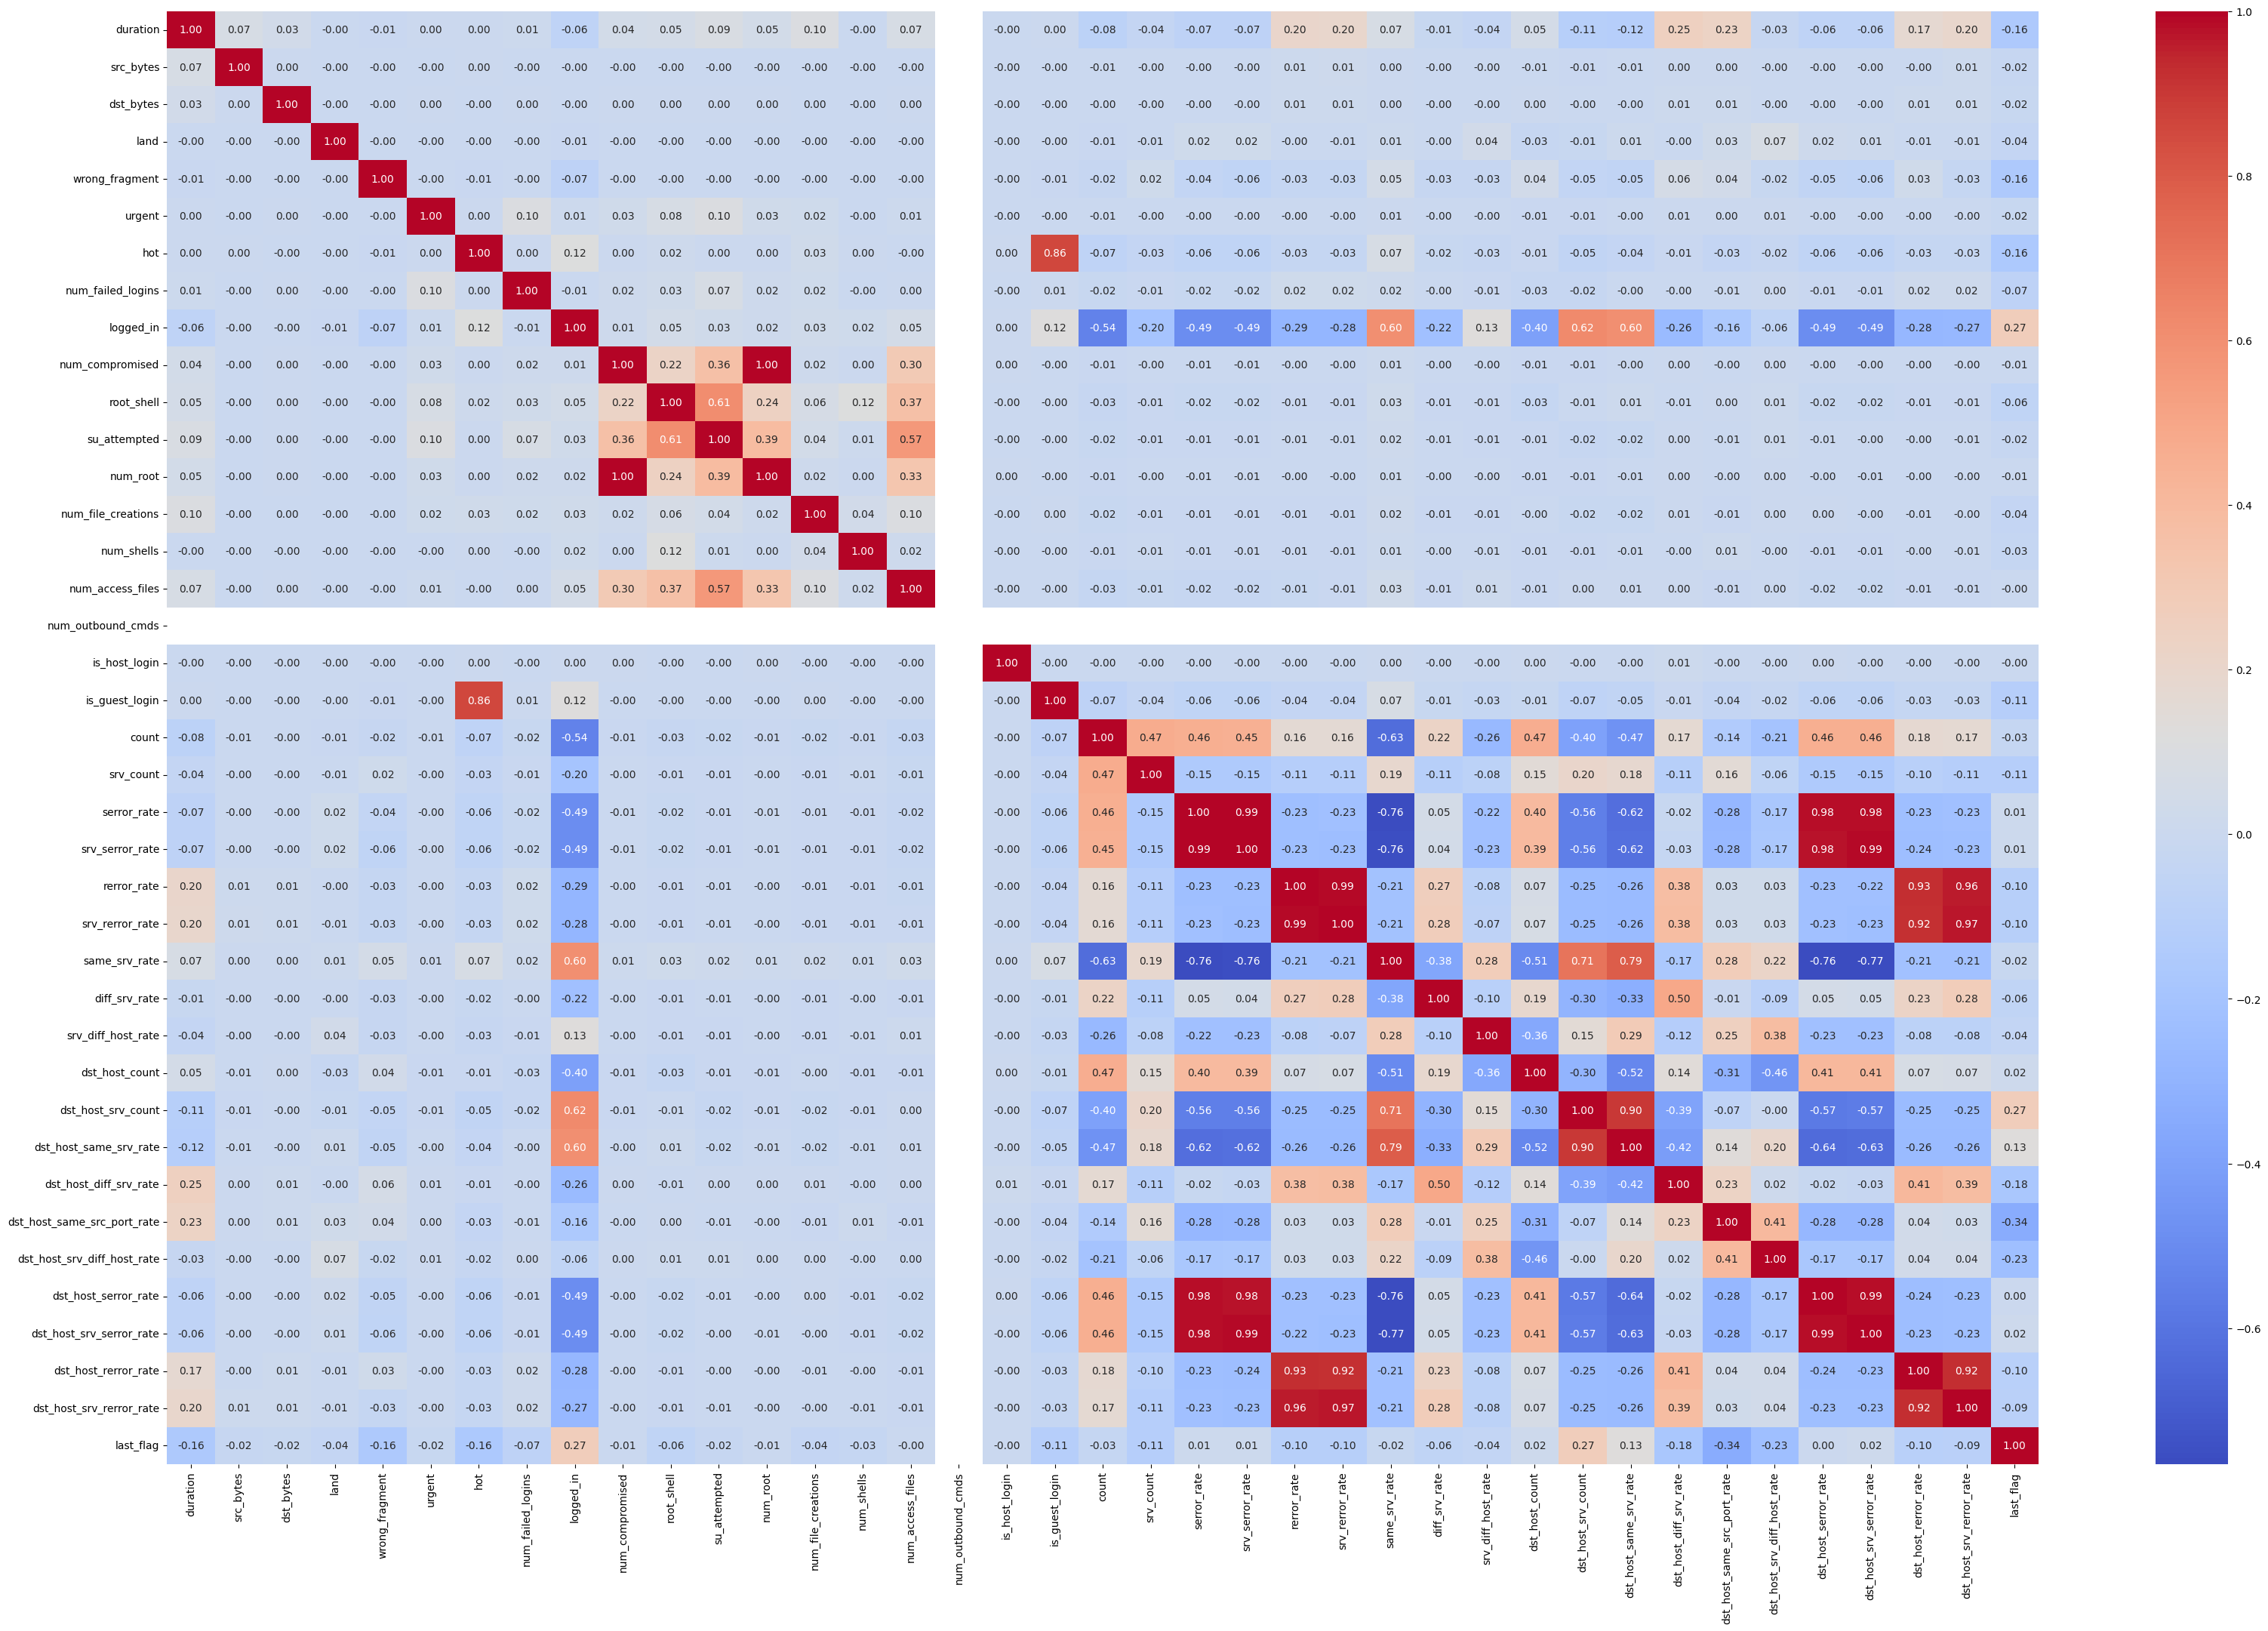

In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
numeric_data = train.drop(['protocol_type', 'flag', 'service','attack'], axis=1)
corr = numeric_data.corr()
plt.figure(figsize=(40,25))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [145]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [146]:
import pandas as pd
import numpy as np
corr_matrix = numeric_data.corr().abs()  # Using abs() to get the absolute value of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
highly_correlated_features = [column for column in upper.columns if any(upper[column] > 0.8)]
numeric_data_reduced = numeric_data.drop(highly_correlated_features, axis=1)


In [59]:
numeric_data_reduced.shape

(125972, 29)

In [147]:
train.loc[train.attack=='normal','attack_class']=0

train.loc[(train.attack=='back') | (train.attack=='land') | (train.attack=='pod') | (train.attack=='neptune') | 
         (train.attack=='smurf') | (train.attack=='teardrop') | (train.attack=='apache2') | (train.attack=='udpstorm') | 
         (train.attack=='processtable') | (train.attack=='worm') | (train.attack=='mailbomb'),'attack_class']=1

train.loc[(train.attack=='satan') | (train.attack=='ipsweep') | (train.attack=='nmap') | (train.attack=='portsweep') | 
          (train.attack=='mscan') | (train.attack=='saint'),'attack_class']=2

train.loc[(train.attack=='guess_passwd') | (train.attack=='ftp_write') | (train.attack=='imap') | (train.attack=='phf') | 
          (train.attack=='multihop') | (train.attack=='warezmaster') | (train.attack=='warezclient') | (train.attack=='spy') | 
          (train.attack=='xlock') | (train.attack=='xsnoop') | (train.attack=='snmpguess') | (train.attack=='snmpgetattack') | 
          (train.attack=='httptunnel') | (train.attack=='sendmail') | (train.attack=='named'),'attack_class']=3

train.loc[(train.attack=='buffer_overflow') | (train.attack=='loadmodule') | (train.attack=='rootkit') | (train.attack=='perl') | 
          (train.attack=='sqlattack') | (train.attack=='xterm') | (train.attack=='ps'),'attack_class']=4

In [148]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,attack_class
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0.0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1.0
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0.0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0.0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1.0


In [149]:
test.loc[test.attack=='normal','attack_class']=0

test.loc[(test.attack=='back') | (test.attack=='land') | (test.attack=='pod') | (test.attack=='neptune') | 
         (test.attack=='smurf') | (test.attack=='teardrop') | (test.attack=='apache2') | (test.attack=='udpstorm') | 
         (test.attack=='processtable') | (test.attack=='worm') | (test.attack=='mailbomb'),'attack_class']=1

test.loc[(test.attack=='satan') | (test.attack=='ipsweep') | (test.attack=='nmap') | (test.attack=='portsweep') | 
          (test.attack=='mscan') | (test.attack=='saint'),'attack_class']=2

test.loc[(test.attack=='guess_passwd') | (test.attack=='ftp_write') | (test.attack=='imap') | (test.attack=='phf') | 
          (test.attack=='multihop') | (test.attack=='warezmaster') | (test.attack=='warezclient') | (test.attack=='spy') | 
          (test.attack=='xlock') | (test.attack=='xsnoop') | (test.attack=='snmpguess') | (test.attack=='snmpgetattack') | 
          (test.attack=='httptunnel') | (test.attack=='sendmail') | (test.attack=='named'),'attack_class']=3

test.loc[(test.attack=='buffer_overflow') | (test.attack=='loadmodule') | (test.attack=='rootkit') | (test.attack=='perl') | 
          (test.attack=='sqlattack') | (test.attack=='xterm') | (test.attack=='ps'),'attack_class']=4

In [150]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,attack_class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21,1.0
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21,0.0
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15,2.0
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11,2.0
4,0,tcp,http,SF,267,14515,0,0,0,0,...,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21,0.0


In [195]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

label_encoding(train)
label_encoding(test)

In [196]:

X_train = train.drop(['attack_class'], axis=1)
Y_train = train['attack_class']

In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'attack',
 'last_flag']

In [224]:
selected_features

array([ 0,  2,  4,  5,  6,  9, 10, 12, 16, 17])

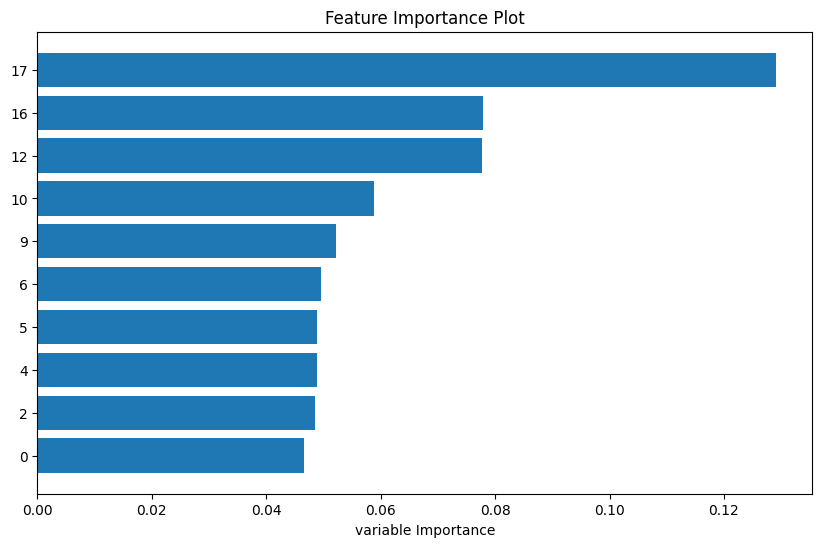

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import numpy as np

# Sample dataset (replace with your actual dataset)
from sklearn.datasets import make_classification
X_train, Y_train = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Create and fit the RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

# Use RFE for feature selection
rfe = RFE(rfc, n_features_to_select=10)
rfe.fit(X_train, Y_train)

# Get selected features
selected_features = np.array(range(X_train.shape[1]))[rfe.support_]

# Get feature importances from the RandomForestClassifier
feature_importances = rfc.feature_importances_

# Get indices of the top 10 features
top10_indices = np.argsort(feature_importances)[-10:]

# Plot the feature importances of the top 10 features
plt.figure(figsize=(10, 6))
plt.title("Feature Importance Plot")
plt.barh(range(10), feature_importances[top10_indices], align='center')
plt.yticks(range(10),selected_features)
plt.xlabel('Features')
plt.xlabel('variable Importance')
plt.show()


In [197]:
#updating your training set X_train by keeping only the selected features
X_train = X_train[selected_features]

In [198]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [199]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [200]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)

In [201]:
X_train, x_test, Y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)
print("Shape of the training input X:", X_train.shape)
print("Shape of the training output y:", Y_train.shape)
print("Shape of the testing input X:", x_test.shape)
print("Shape of the testing output y:", y_test.shape)

Shape of the training input X: (88180, 10)
Shape of the training output y: (88180,)
Shape of the testing input X: (37792, 10)
Shape of the testing output y: (37792,)


#### XGBOOST classifier

In [180]:
xgb_classifier = GradientBoostingClassifier()
xgb_classifier.fit(X_train, Y_train)

GradientBoostingClassifier()

In [181]:
xgb_pred = xgb_classifier.predict(x_test)
accuracy = accuracy_score(y_test, xgb_pred)
report = classification_report(y_test, xgb_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9959515241320914
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20082
         1.0       1.00      1.00      1.00     13837
         2.0       0.98      0.99      0.99      3547
         3.0       0.97      0.95      0.96       304
         4.0       0.50      0.18      0.27        22

    accuracy                           1.00     37792
   macro avg       0.89      0.82      0.84     37792
weighted avg       1.00      1.00      1.00     37792



In [182]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load a sample dataset for demonstration
# Replace this with your dataset
X, y = load_iris(return_X_y=True)

# Define the XGBoost classifier
model = xgb.XGBClassifier()

# Configure K-Fold cross-validation
kfold = KFold(n_splits=8, shuffle=True, random_state=42)

# To store the scores
scores = []

# Enumerate splits
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print(f"Fold Accuracy: {accuracy}")

# Average accuracy across all folds
print(f"Mean Accuracy: {np.mean(scores)}")


Fold Accuracy: 1.0
Fold Accuracy: 1.0
Fold Accuracy: 0.9473684210526315
Fold Accuracy: 0.9473684210526315
Fold Accuracy: 0.7894736842105263
Fold Accuracy: 0.9473684210526315
Fold Accuracy: 0.9444444444444444
Fold Accuracy: 0.9444444444444444
Mean Accuracy: 0.9400584795321637


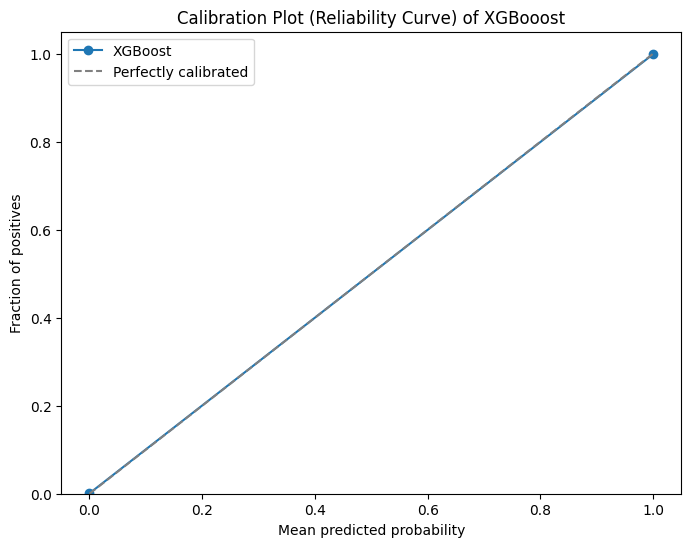

In [89]:
from sklearn.calibration import calibration_curve
y_test_binary = (y_test == 1).astype(int)
y_pred_binary = (xgb_pred == 1).astype(int)
prob_true, prob_pred = calibration_curve(y_test_binary, y_pred_binary, n_bins=10)

# Plot calibration curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='XGBoost')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Plot (Reliability Curve) of XGBooost')
plt.legend()
plt.ylim(0, 1.05)
plt.show()

In [26]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 1.6 MB/s eta 0:01:03
   ---------------------------------------- 0.3/99.8 MB 3.9 MB/s eta 0:00:26
   ---------------------------------------- 0.6/99.8 MB 4.7 MB/s eta 0:00:22
   ---------------------------------------- 0.8/99.8 MB 5.0 MB/s eta 0:00:20
   ---------------------------------------- 1.1/99.8 MB 5.2 MB/s eta 0:00:20
   ---------------------------------------- 1.1/99.8 MB 4.7 MB/s eta 0:00:21
    --------------------------------------- 1.4/99.8 MB 4.6 MB/s eta 0:00:22
    --------------------------------------- 1.6/99.8 MB 4.6 MB/s eta 0:00:22
    --------------------------------------- 1.7/99.8 MB 4.5 MB/s eta 0:00:22
    --------------------------------------- 1.9/99.8 MB 4.6 MB/s eta 0:00:22
    --------------------------------------- 2.1/99.8 MB 4.7 MB/s eta 0:00:21
    -

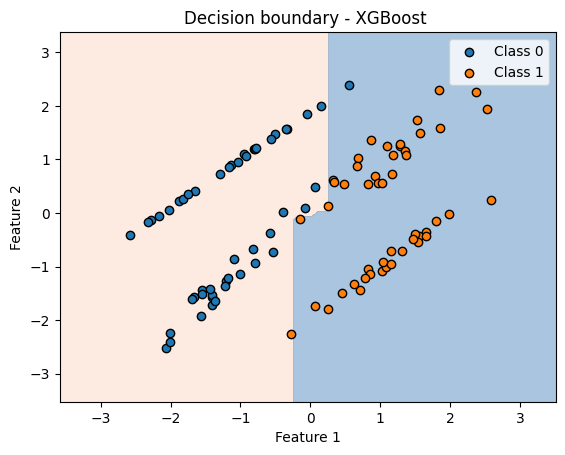

In [29]:
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Plotting decision boundary for classes 0 and 1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary for class 0
plt.contourf(xx, yy, Z, levels=[-1, 0.5, 1], alpha=0.4, cmap='RdBu')
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0', edgecolors='k')
# Plot decision boundary for class 1
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', edgecolors='k')

plt.title('Decision boundary - XGBoost ')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


### K-Nearest Neighbors

In [191]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [192]:
knn_pred = knn_classifier.predict(x_test)
accuracy = accuracy_score(y_test, knn_pred)
report = classification_report(y_test, knn_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9980948348856901
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20082
         1.0       1.00      1.00      1.00     13837
         2.0       0.99      1.00      0.99      3547
         3.0       0.98      0.94      0.96       304
         4.0       0.80      0.55      0.65        22

    accuracy                           1.00     37792
   macro avg       0.95      0.90      0.92     37792
weighted avg       1.00      1.00      1.00     37792



In [214]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

# Load a sample dataset for demonstration
# Replace this with your dataset
X, y = load_iris(return_X_y=True)

# Define the KNN classifier
model = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors as needed

# Configure K-Fold cross-validation
kfold = KFold(n_splits=8, shuffle=True, random_state=42)

# To store the scores
scores = []

# Enumerate splits
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print(f"Fold Accuracy: {accuracy}")

# Average accuracy across all folds
print(f"Mean Accuracy: {np.mean(scores)}")


Fold Accuracy: 1.0
Fold Accuracy: 1.0
Fold Accuracy: 0.9473684210526315
Fold Accuracy: 1.0
Fold Accuracy: 0.8947368421052632
Fold Accuracy: 0.8947368421052632
Fold Accuracy: 1.0
Fold Accuracy: 0.9444444444444444
Mean Accuracy: 0.9601608187134503


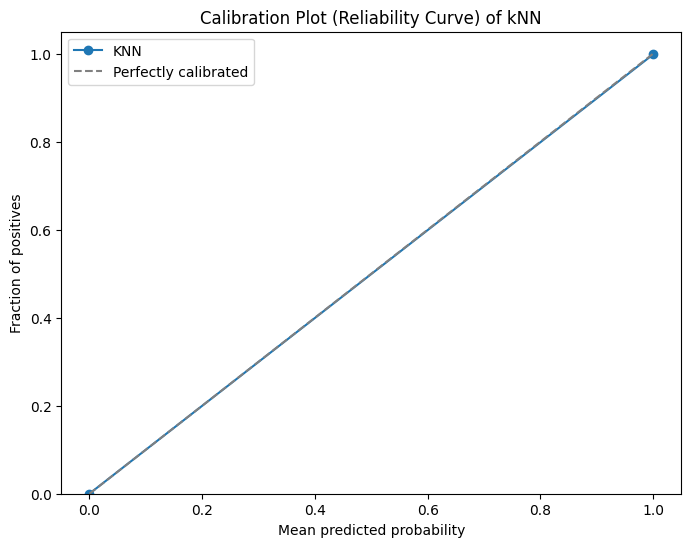

In [65]:
from sklearn.calibration import calibration_curve
y_test_binary = (y_test == 1).astype(int)
y_pred_binary = (knn_pred == 1).astype(int)
prob_true, prob_pred = calibration_curve(y_test_binary, y_pred_binary, n_bins=10)

# Plot calibration curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='KNN')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Plot (Reliability Curve) of kNN')
plt.legend()
plt.ylim(0, 1.05)
plt.show()

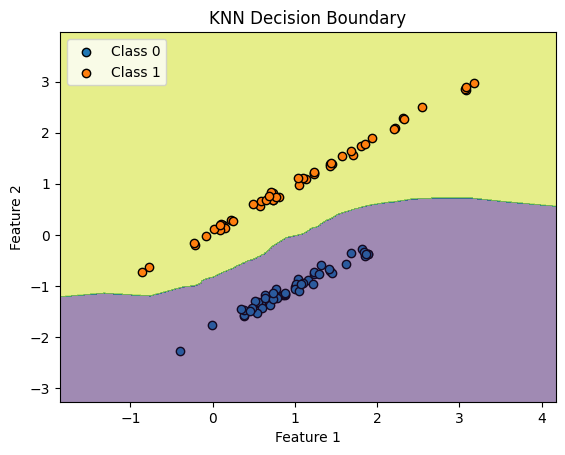

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Plot decision boundary for class 0
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='o', edgecolors='k', label='Class 0')

# Plot decision boundary for class 1
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', edgecolors='k', label='Class 1')

plt.title("KNN Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


#### CatBoost

In [202]:
from catboost import CatBoostClassifier
catboost_classifier = CatBoostClassifier()
catboost_classifier.fit(X_train, Y_train)

Learning rate set to 0.099435
0:	learn: 1.2620536	total: 260ms	remaining: 4m 19s
1:	learn: 1.0451921	total: 459ms	remaining: 3m 49s
2:	learn: 0.8876297	total: 666ms	remaining: 3m 41s
3:	learn: 0.7657019	total: 740ms	remaining: 3m 4s
4:	learn: 0.6659858	total: 805ms	remaining: 2m 40s
5:	learn: 0.5857968	total: 872ms	remaining: 2m 24s
6:	learn: 0.5175978	total: 984ms	remaining: 2m 19s
7:	learn: 0.4611919	total: 1.07s	remaining: 2m 12s
8:	learn: 0.4132154	total: 1.15s	remaining: 2m 6s
9:	learn: 0.3700288	total: 1.21s	remaining: 1m 59s
10:	learn: 0.3331610	total: 1.3s	remaining: 1m 57s
11:	learn: 0.3012072	total: 1.39s	remaining: 1m 54s
12:	learn: 0.2728323	total: 1.52s	remaining: 1m 55s
13:	learn: 0.2477113	total: 1.64s	remaining: 1m 55s
14:	learn: 0.2256422	total: 1.73s	remaining: 1m 53s
15:	learn: 0.2063148	total: 1.81s	remaining: 1m 51s
16:	learn: 0.1891897	total: 1.88s	remaining: 1m 48s
17:	learn: 0.1737278	total: 1.96s	remaining: 1m 46s
18:	learn: 0.1601291	total: 2.02s	remaining: 1m

In [203]:
catboost_pred = catboost_classifier.predict(x_test)
accuracy = accuracy_score(y_test, catboost_pred)
report = classification_report(y_test, catboost_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9992591024555462
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20082
         1.0       1.00      1.00      1.00     13837
         2.0       1.00      1.00      1.00      3547
         3.0       0.99      0.99      0.99       304
         4.0       1.00      0.68      0.81        22

    accuracy                           1.00     37792
   macro avg       1.00      0.93      0.96     37792
weighted avg       1.00      1.00      1.00     37792



In [213]:
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load a sample dataset for demonstration
# Replace this with your dataset
X, y = load_iris(return_X_y=True)

# Define the CatBoost classifier
# Note: You can adjust the parameters of CatBoostClassifier() as needed
model = CatBoostClassifier(verbose=0)  # `verbose=0` to silence the training output

# Configure K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# To store the scores
scores = []

# Enumerate splits
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print(f"Fold Accuracy: {accuracy}")

# Average accuracy across all folds
print(f"Mean Accuracy: {np.mean(scores)}")


Fold Accuracy: 1.0
Fold Accuracy: 0.9666666666666667
Fold Accuracy: 0.9333333333333333
Fold Accuracy: 0.9333333333333333
Fold Accuracy: 0.9333333333333333
Mean Accuracy: 0.9533333333333335


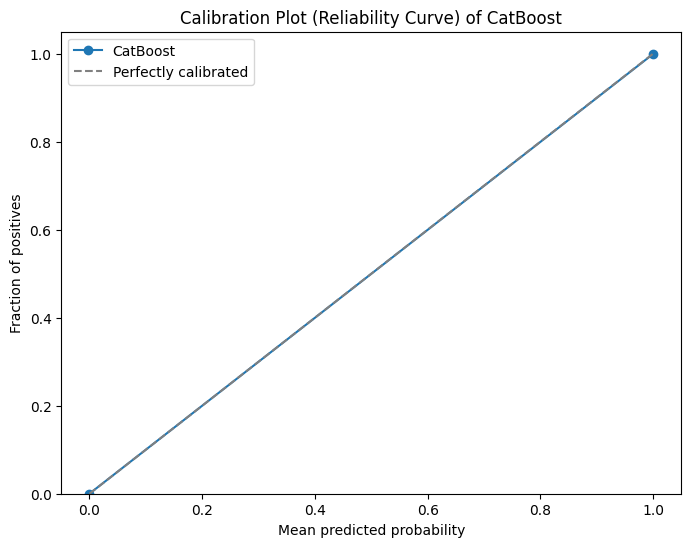

In [75]:
from sklearn.calibration import calibration_curve
y_test_binary = (y_test == 1).astype(int)
y_pred_binary = (catboost_pred == 1).astype(int)
prob_true, prob_pred = calibration_curve(y_test_binary, y_pred_binary, n_bins=10)

# Plot calibration curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='CatBoost')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Plot (Reliability Curve) of CatBoost')
plt.legend()
plt.ylim(0, 1.05)
plt.show()

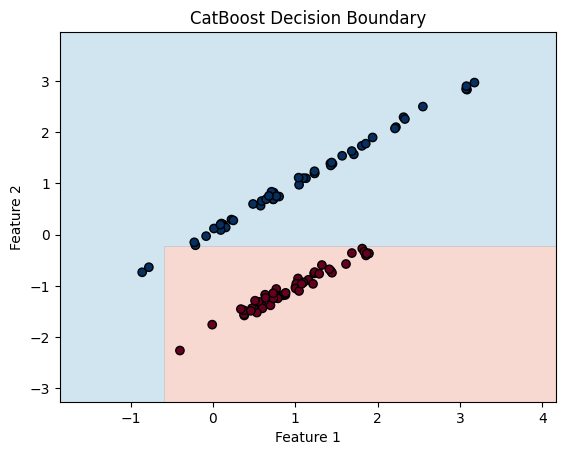

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification

# Generate a synthetic dataset for illustration
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Fit the CatBoost classifier
clf = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='Logloss', verbose=False)
clf.fit(X, y)
def plot_decision_boundary(X, y, model):
    h = .02  # Step size in the mesh

    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict class probabilities for each point in the mesh grid
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Reshape the result to the same shape as the mesh grid
    Z = Z.reshape(xx.shape)

    # Plot filled contours for decision boundary
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap="RdBu", alpha=0.3)

    # Scatter plot the data points with colors
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="RdBu", edgecolors="k", marker="o")
    plt.title("CatBoost Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot the decision boundary with colors
plot_decision_boundary(X, y, clf)







####  QuadraticDiscriminantAnalysis

In [204]:
qda_classifier = QuadraticDiscriminantAnalysis()
qda_classifier.fit(X_train, Y_train)

C:\Users\swethachintalapudi\AppData\Roaming\Python\Python311\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [205]:
qda_pred = qda_classifier.predict(x_test)
accuracy = accuracy_score(y_test, qda_pred)
report = classification_report(y_test, qda_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9321284928027096
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     20082
         1.0       0.98      0.98      0.98     13837
         2.0       0.91      0.56      0.69      3547
         3.0       0.31      0.16      0.22       304
         4.0       0.01      0.82      0.02        22

    accuracy                           0.93     37792
   macro avg       0.64      0.70      0.58     37792
weighted avg       0.98      0.93      0.95     37792



In [212]:
import numpy as np
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load a sample dataset for demonstration
# Replace this with your dataset
X, y = load_iris(return_X_y=True)

# Define the QDA classifier
model = QuadraticDiscriminantAnalysis()

# Configure K-Fold cross-validation
kfold = KFold(n_splits=8, shuffle=True, random_state=42)

# To store the scores
scores = []

# Enumerate splits
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print(f"Fold Accuracy: {accuracy}")

# Average accuracy across all folds
print(f"Mean Accuracy: {np.mean(scores)}")


Fold Accuracy: 0.9473684210526315
Fold Accuracy: 1.0
Fold Accuracy: 0.9473684210526315
Fold Accuracy: 1.0
Fold Accuracy: 0.8947368421052632
Fold Accuracy: 1.0
Fold Accuracy: 1.0
Fold Accuracy: 1.0
Mean Accuracy: 0.9736842105263157


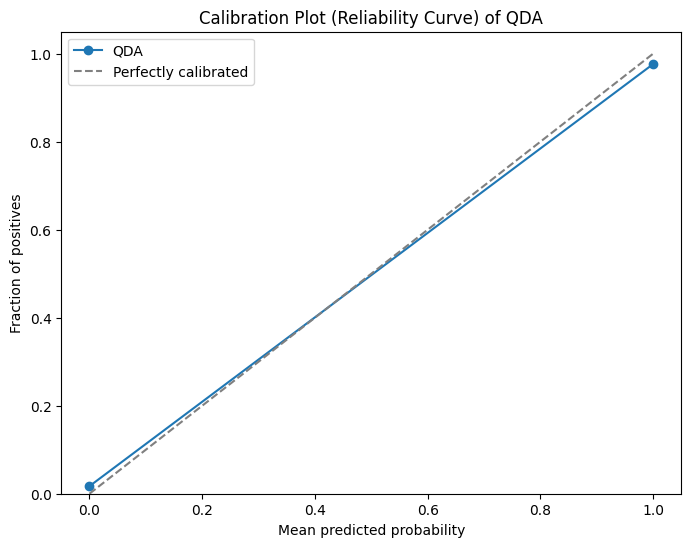

In [82]:
from sklearn.calibration import calibration_curve
y_test_binary = (y_test == 1).astype(int)
y_pred_binary = (qda_pred == 1).astype(int)
prob_true, prob_pred = calibration_curve(y_test_binary, y_pred_binary, n_bins=10)

# Plot calibration curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='QDA')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Plot (Reliability Curve) of QDA')
plt.legend()
plt.ylim(0, 1.05)
plt.show()

#### GaussianNB

In [206]:
nb_classifier =GaussianNB()
nb_classifier.fit(X_train, Y_train)

GaussianNB()

In [207]:
nb_pred = nb_classifier.predict(x_test)
accuracy = accuracy_score(y_test, nb_pred)
report = classification_report(y_test, nb_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.8952159187129551
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.92      0.95     20082
         1.0       0.94      0.90      0.92     13837
         2.0       0.66      0.73      0.69      3547
         3.0       0.30      0.88      0.45       304
         4.0       0.02      0.68      0.04        22

    accuracy                           0.90     37792
   macro avg       0.58      0.82      0.61     37792
weighted avg       0.93      0.90      0.91     37792



In [210]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB

# Load a sample dataset for demonstration
# Replace this with your dataset
X, y = load_iris(return_X_y=True)

# Define the Gaussian Naive Bayes classifier
model = GaussianNB()

# Configure K-Fold cross-validation
kfold = KFold(n_splits=8, shuffle=True, random_state=42)

# To store the scores
scores = []

# Enumerate splits
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print(f"Fold Accuracy: {accuracy}")

# Average accuracy across all folds
print(f"Mean Accuracy: {np.mean(scores)}")


Fold Accuracy: 1.0
Fold Accuracy: 1.0
Fold Accuracy: 0.9473684210526315
Fold Accuracy: 1.0
Fold Accuracy: 0.8421052631578947
Fold Accuracy: 0.9473684210526315
Fold Accuracy: 1.0
Fold Accuracy: 0.8888888888888888
Mean Accuracy: 0.9532163742690059


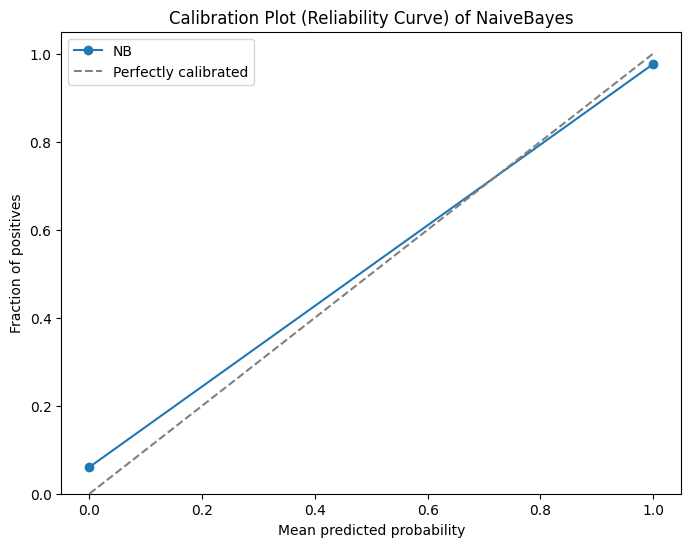

In [83]:
from sklearn.calibration import calibration_curve
y_test_binary = (y_test == 1).astype(int)
y_pred_binary = (nb_pred == 1).astype(int)
prob_true, prob_pred = calibration_curve(y_test_binary, y_pred_binary, n_bins=10)

# Plot calibration curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='NB')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Plot (Reliability Curve) of NaiveBayes')
plt.legend()
plt.ylim(0, 1.05)
plt.show()

### Support Vector Machine (SVM)

In [208]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [209]:
svm_pred = svm_classifier.predict(x_test)
accuracy = accuracy_score(y_test, svm_pred)
report = classification_report(y_test, svm_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9491162150719729
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96     20082
         1.0       0.96      0.95      0.96     13837
         2.0       0.84      0.89      0.86      3547
         3.0       0.89      0.83      0.86       304
         4.0       0.00      0.00      0.00        22

    accuracy                           0.95     37792
   macro avg       0.73      0.73      0.73     37792
weighted avg       0.95      0.95      0.95     37792



C:\Users\swethachintalapudi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\swethachintalapudi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\swethachintalapudi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [211]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load a sample dataset for demonstration
# Replace this with your dataset
X, y = load_iris(return_X_y=True)

# Define the SVM classifier
model = SVC()

# Configure K-Fold cross-validation
kfold = KFold(n_splits=8, shuffle=True, random_state=42)

# To store the scores
scores = []

# Enumerate splits
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print(f"Fold Accuracy: {accuracy}")

# Average accuracy across all folds
print(f"Mean Accuracy: {np.mean(scores)}")


Fold Accuracy: 1.0
Fold Accuracy: 1.0
Fold Accuracy: 1.0
Fold Accuracy: 0.9473684210526315
Fold Accuracy: 0.8947368421052632
Fold Accuracy: 1.0
Fold Accuracy: 1.0
Fold Accuracy: 0.9444444444444444
Mean Accuracy: 0.9733187134502923


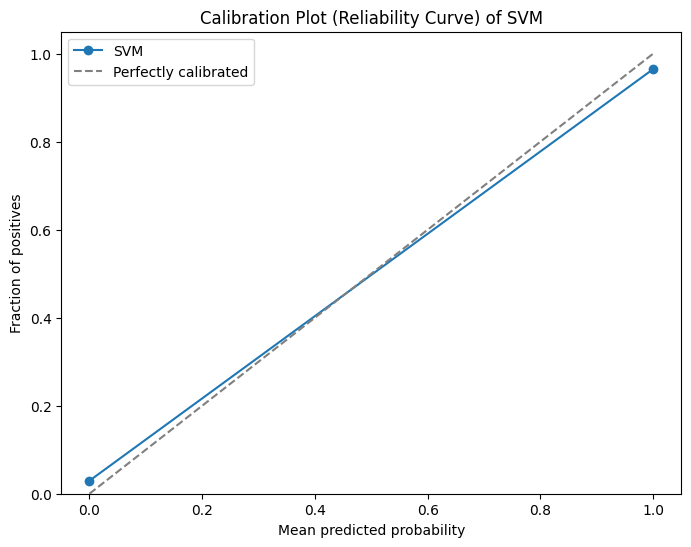

In [84]:
from sklearn.calibration import calibration_curve
y_test_binary = (y_test == 1).astype(int)
y_pred_binary = (svm_pred == 1).astype(int)
prob_true, prob_pred = calibration_curve(y_test_binary, y_pred_binary, n_bins=10)

# Plot calibration curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='SVM')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Plot (Reliability Curve) of SVM')
plt.legend()
plt.ylim(0, 1.05)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


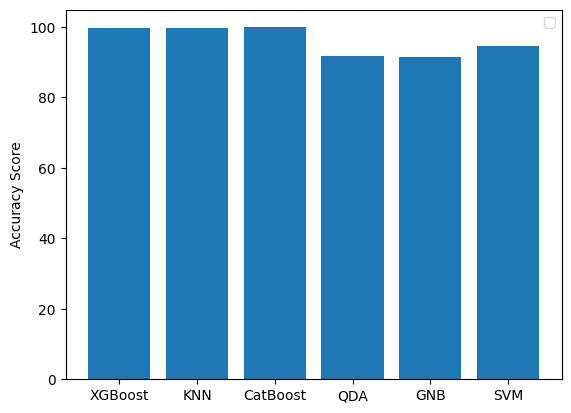

In [42]:
import matplotlib.pyplot as plt
acc = [99.8,99.8,99.9,91.8,91.4,94.7]
models = ['XGBoost','KNN','CatBoost','QDA','GNB','SVM']
if len(models) == len(acc):

    plt.bar(models, acc )
    plt.ylabel('Accuracy Score')
    plt.legend()
    plt.show()
else:
    print("Error: The number of models and accuracy scores do not match.")

# Save Model

In [46]:
import pickle
# Saving model to disk of random forest
pickle.dump(xgb_classifier, open('model.pkl','wb'))

# Load Model and Predict

In [52]:
import pickle
model=pickle.load(open('model.pkl', 'rb'))
